<a href="https://colab.research.google.com/github/CoderArshia/Project-122/blob/main/Project_122_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from PIL import Image
import PIL.ImageOps
import os, ssl, time


In [38]:
from google.colab import files 
data = files.upload()

Saving labels.csv to labels (2).csv


In [39]:
from google.colab import files 
data = files.upload()

Saving image.npz to image (1).npz


In [40]:
X = np.load("image.npz")["arr_0"]
y = pd.read_csv("labels.csv")["labels"]
print(pd.Series(y).value_counts())
classes = ['A', 'B', 'C', 'D', 'E','F', 'G', 'H', 'I', 'J', "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
nclasses = len(classes)


T    550
I    550
W    550
E    550
S    550
Z    550
M    550
U    550
B    550
R    550
D    550
J    550
V    550
Q    550
H    550
G    550
Y    550
A    550
O    550
L    550
N    550
F    550
K    550
X    550
C    550
P    550
Name: labels, dtype: int64


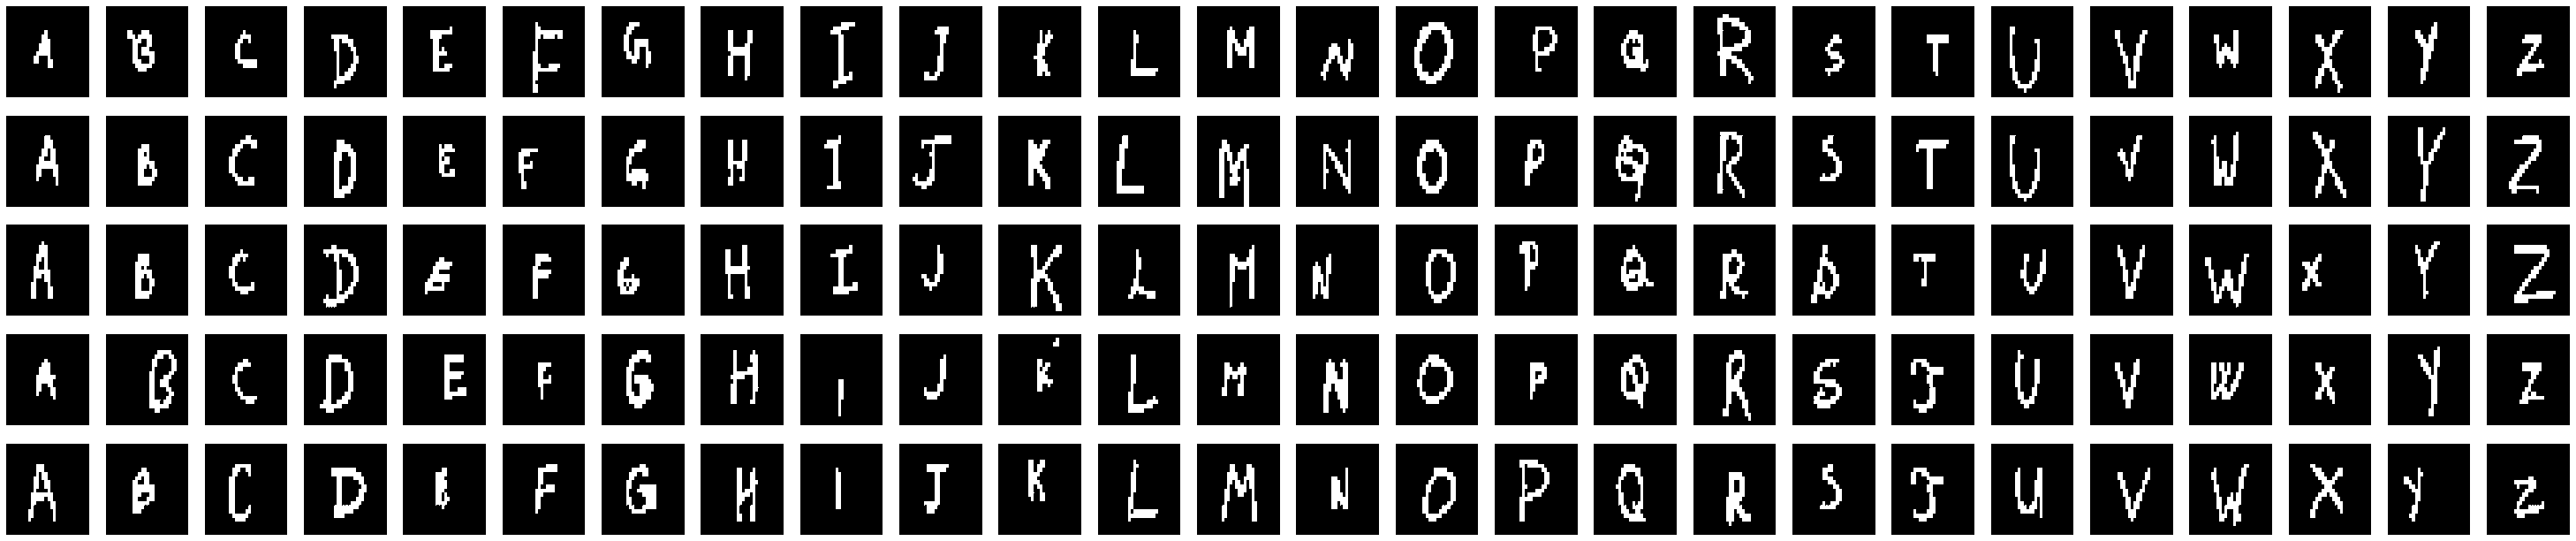

In [41]:
samples_per_class=5
figure=plt.figure(figsize=(nclasses*2,(1+samples_per_class*2)))
idx_cls=0

for cls in classes:
  idxs=np.flatnonzero(y==cls)
  idxs=np.random.choice(idxs,samples_per_class,replace=False)
  i = 0

  for idx in idxs:
    plt_idx=i*nclasses+idx_cls+1
    p = plt.subplot(samples_per_class,nclasses,plt_idx);
    p = sns.heatmap(np.reshape(X[idx],(22,30)),cmap=plt.cm.gray,xticklabels=False,yticklabels=False,cbar=False);
    p = plt.axis("off");
    i+=1

  idx_cls+=1


  

In [42]:
print(len(X))
print(len(X[0]))



14300
660


In [43]:
print(X[0])
print(y[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.
 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 255. 255.   0.   0.   0.   0.
   0. 

In [44]:
X_train, X_test, y_train, y_test = train_test_split (X,y,random_state=9,train_size=7500,test_size = 2500)

X_train_scaled=X_train/255.0
X_test_scaled=X_test/255.0

clf=LogisticRegression(solver="saga",multi_class="multinomial").fit(X_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [45]:
y_pred=clf.predict(X_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)

99.52


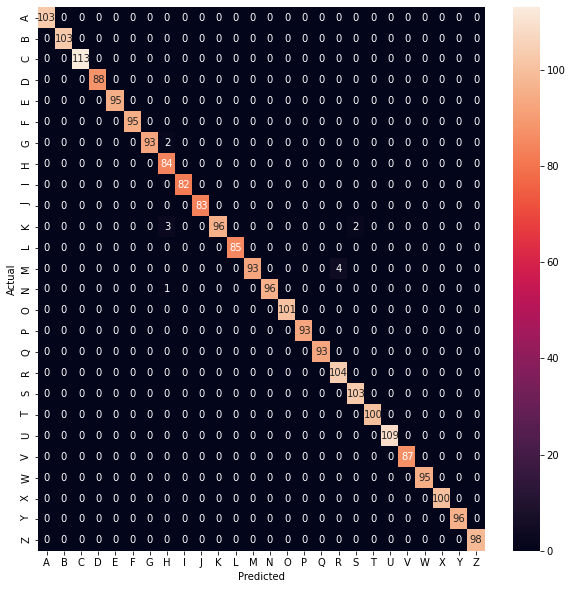

In [46]:
 cm=pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=["Predicted"])
 p = plt.figure(figsize=(10,10));
 p = sns.heatmap(cm,annot=True,fmt="d",cbar=True)